Rule Based Model 

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the training dataset
data_train = pd.read_csv("fare_prediction_data/train.csv")

# Load the test dataset
data_test = pd.read_csv("fare_prediction_data/test.csv")

In [3]:
# Select features and target variable for both training and test sets
X_train = data_train[['trip_distance', 'trip_time']]
y_train = data_train['fare_amount']

X_test = data_test[['trip_distance', 'trip_time']]
y_test = data_test['fare_amount']

In [15]:
# Define a simple rule-based model
def rule_based_model(trip_distance, trip_time):
    if trip_distance < 5:
        if trip_time < 10:
            return 10  # Minimum fare
        elif trip_time < 20:
            return 15
        else:
            return 20
    elif trip_distance < 10:
        return 25
    elif trip_distance < 20:
        return 40
    elif trip_distance < 35:
        return 60
    else:
        return 100

In [16]:
# Apply the rule-based model to make predictions on the test set
y_pred = X_test.apply(lambda row: rule_based_model(row['trip_distance'], row['trip_time']), axis=1)

In [17]:
# Apply the rule-based model to make predictions on the test set
y_pred = X_test.apply(lambda row: rule_based_model(row['trip_distance'], row['trip_time']), axis=1)

In [18]:
data_test["predicted_amount"] = y_pred
test_data = data_test.copy()

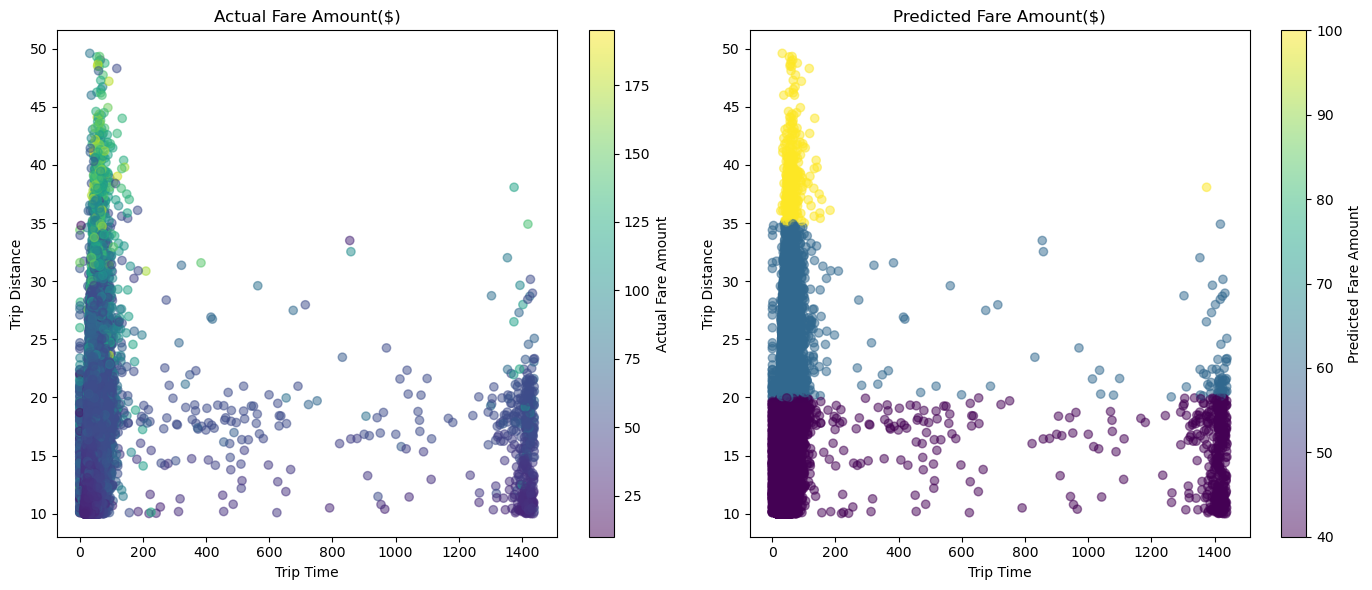

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

# Actual fare amounts
plt.subplot(1, 2, 1)
plt.scatter(test_data['trip_time'], test_data['trip_distance'], c=test_data['fare_amount'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Actual Fare Amount')
plt.xlabel('Trip Time')
plt.ylabel('Trip Distance')
plt.title('Actual Fare Amount($)')

# Predicted fare amounts
plt.subplot(1, 2, 2)
plt.scatter(test_data['trip_time'], test_data['trip_distance'], c=test_data['predicted_amount'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Predicted Fare Amount')
plt.xlabel('Trip Time')
plt.ylabel('Trip Distance')
plt.title('Predicted Fare Amount($)')

plt.tight_layout()
plt.show()

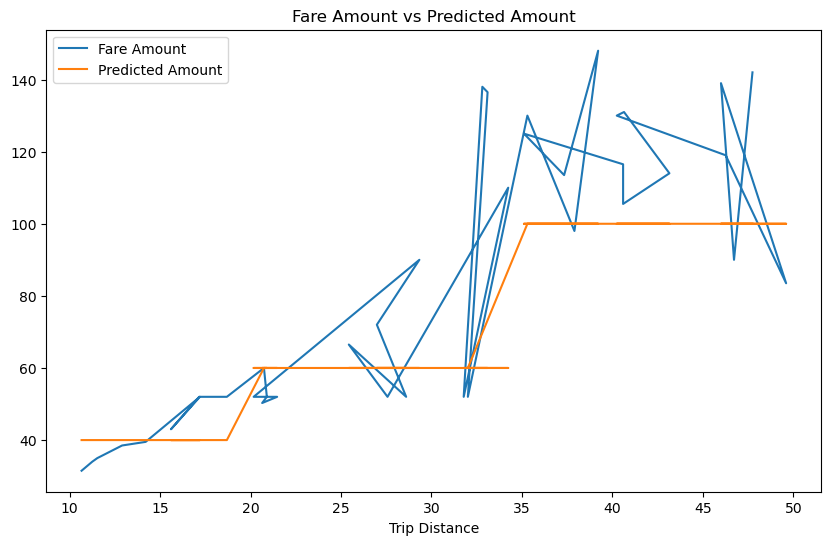

In [20]:
import numpy as np

def sample_plot(data, column, num=50):
  #  Define number of bins
  num_bins = 10
  bins = np.linspace(0, num, num_bins + 1)
  sampled_data_list = []

  # Sample evenly from each bin
  for i in range(num_bins):
      bin_data = data[(data[column] >= bins[i]) & (data[column] < bins[i+1])]
      if not bin_data.empty:
          sampled_data_list.append(bin_data.sample(min(len(bin_data), 5), random_state=42))

  sampled_data = pd.concat(sampled_data_list)

  return sampled_data

sample = sample_plot(test_data, 'trip_distance')
plt.figure(figsize=(10, 6))

plt.plot(sample['trip_distance'], sample['fare_amount'], label='Fare Amount')
plt.plot(sample['trip_distance'], sample['predicted_amount'], label='Predicted Amount')
plt.title('Fare Amount vs Predicted Amount')
plt.xlabel('Trip Distance')
plt.legend()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 143.79
Mean Absolute Error: 9.39
